# 1-import libararies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

# 2-reading data

In [2]:
df=pd.read_table('cc_approvals.data',sep=',',header=None,names=['gender','age','Debt','Married','BankCustomer','EducationLevel',
                                                               'Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','Approved'])

In [3]:
df.head(5)

,gender,age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          690 non-null    object 
 1   age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [5]:
df.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


# 3-cleaning data

In [6]:
df.isnull().sum()

gender            0
age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [7]:
df.head(1)

,gender,age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.0,u,g,w,v,1.25,t,t,1,f,g,00202,0,+


In [8]:
df['gender'].value_counts()

b    468
a    210
?     12
Name: gender, dtype: int64

In [9]:
for n,i in enumerate (df['gender'].tolist()):
    if i=='?':
        
        print(f'index {n} value is {i}')
                      

index 248 value is ?
index 327 value is ?
index 346 value is ?
index 374 value is ?
index 453 value is ?
index 479 value is ?
index 489 value is ?
index 520 value is ?
index 598 value is ?
index 601 value is ?
index 641 value is ?
index 673 value is ?


In [11]:
df.drop(df[df['gender']=='?'].index,axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df

,gender,age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
674,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
675,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
676,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [12]:
df['age'].unique()

array(['30.83', '58.67', '24.50', '27.83', '20.17', '32.08', '33.17',
       '22.92', '54.42', '42.50', '22.08', '29.92', '38.25', '48.08',
       '45.83', '36.67', '28.25', '23.25', '21.83', '19.17', '25.00',
       '47.75', '27.42', '41.17', '15.83', '47.00', '56.58', '57.42',
       '42.08', '29.25', '42.00', '49.50', '36.75', '22.58', '27.25',
       '23.00', '27.75', '54.58', '34.17', '28.92', '29.67', '39.58',
       '56.42', '54.33', '41.00', '31.92', '41.50', '23.92', '25.75',
       '26.00', '37.42', '34.92', '34.25', '23.33', '23.17', '44.33',
       '35.17', '43.25', '56.75', '31.67', '23.42', '20.42', '26.67',
       '36.00', '25.50', '19.42', '32.33', '34.83', '38.58', '44.25',
       '44.83', '20.67', '34.08', '21.67', '21.50', '49.58', '27.67',
       '39.83', '?', '37.17', '25.67', '34.00', '49.00', '62.50', '31.42',
       '52.33', '28.75', '28.58', '22.50', '28.50', '37.50', '35.25',
       '18.67', '54.83', '40.92', '19.75', '29.17', '24.58', '33.75',
       '25.42',

In [13]:
for n,i in enumerate (df['age'].tolist()):
    try:
        a=float(i)
    except:
        print(f'index {n} value is {i}')
                      

index 83 value is ?
index 86 value is ?
index 92 value is ?
index 97 value is ?
index 253 value is ?
index 285 value is ?
index 327 value is ?
index 441 value is ?
index 446 value is ?
index 493 value is ?
index 508 value is ?
index 598 value is ?


In [14]:
df[df['age']=='?']

,gender,age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
253,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-
285,a,?,1.500,u,g,ff,ff,0.000,f,t,2,t,g,00200,105,-
327,b,?,4.000,y,p,i,v,0.085,f,f,0,t,g,00411,0,-
441,a,?,11.250,u,g,ff,ff,0.000,f,f,0,f,g,?,5200,-
446,b,?,3.000,y,p,i,bb,7.000,f,f,0,f,g,00000,1,-
493,b,?,4.000,u,g,x,v,5.000,t,t,3,t,g,00290,2279,+


In [15]:
df.drop(df[df['age']=='?'].index,axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df

,gender,age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
662,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
663,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
664,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [16]:
df['Married'].value_counts()

u    503
y    155
?      6
l      2
Name: Married, dtype: int64

In [17]:
for n,i in enumerate(df['Married']):
    if i=='?':
        print(f'index {n} value is{i}')
        

index 202 value is?
index 264 value is?
index 321 value is?
index 442 value is?
index 573 value is?
index 600 value is?


In [18]:
df[df['Married']=='?']

,gender,age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
202,a,71.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
264,b,37.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
321,b,20.42,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,-
442,b,34.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,-
573,b,23.17,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
600,a,25.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+


In [19]:
df.drop(df[df['Married']=='?'].index,axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [20]:
df['BankCustomer'].value_counts()

g     503
p     155
gg      2
Name: BankCustomer, dtype: int64

In [21]:
df['Citizen'].value_counts()

g    605
s     53
p      2
Name: Citizen, dtype: int64

In [22]:
df['YearsEmployed'].unique()

array([ 1.25 ,  3.04 ,  1.5  ,  3.75 ,  1.71 ,  2.5  ,  6.5  ,  0.04 ,
        3.96 ,  3.165,  2.165,  4.335,  1.   ,  5.   ,  0.25 ,  0.96 ,
        3.17 ,  0.665,  0.75 ,  0.835,  7.875,  3.085,  0.5  ,  5.165,
       15.   ,  7.   ,  5.04 ,  7.96 ,  7.585,  0.415,  2.   ,  1.835,
       14.415,  4.5  ,  5.335,  8.625, 28.5  ,  2.625,  0.125,  6.04 ,
        3.5  ,  0.165,  0.875,  1.75 ,  0.   ,  7.415,  0.085,  5.75 ,
        6.   ,  3.   ,  1.585,  4.29 ,  1.54 ,  1.46 ,  1.625, 12.5  ,
       13.5  , 10.75 ,  0.375,  0.585,  0.455,  4.   ,  9.46 ,  2.25 ,
       10.   ,  0.795,  1.375,  1.29 , 11.5  ,  6.29 , 14.   ,  0.335,
        1.21 ,  7.375,  8.5  ,  7.5  ,  3.25 , 13.   ,  5.5  ,  4.25 ,
        0.625,  5.085,  2.75 ,  2.375,  8.   ,  1.085,  2.54 ,  4.165,
        1.665, 11.   ,  9.   ,  1.335,  1.415,  1.96 ,  2.585,  5.125,
       15.5  ,  0.71 ,  5.665, 18.   ,  5.25 ,  8.665,  2.29 , 20.   ,
        2.46 , 13.875,  2.085,  4.58 ,  2.71 ,  2.04 ,  0.29 ,  0.46 ,
      

In [23]:
df['PriorDefault'].value_counts()

t    353
f    307
Name: PriorDefault, dtype: int64

In [24]:
df['Employed'].value_counts()

f    370
t    290
Name: Employed, dtype: int64

In [25]:
df['CreditScore'].unique()

array([ 1,  6,  0,  5,  7, 10,  3, 17,  2,  9,  8, 15, 11, 12, 40, 23,  4,
       20, 67, 14, 16, 13, 19], dtype=int64)

In [26]:
df['DriversLicense'].value_counts()

f    356
t    304
Name: DriversLicense, dtype: int64

In [27]:
df[df['ZipCode']=='?']

,gender,age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
198,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
238,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
270,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,?,0,-
392,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,?,18,-
598,b,22.00,7.835,y,p,i,bb,0.165,f,f,0,t,g,?,0,-


In [28]:
df.drop(df[df['ZipCode']=='?'].index,axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [29]:
df['Income'].unique()

array([     0,    560,    824,      3,  31285,   1349,    314,   1442,
          200,   2690,    245,   1208,   1260,     11,  10000,   5000,
         4000,     35,    713,    551,    500,    300,    221,   2283,
          100,     15,    284,   1236,   5800,    730,    400,  50000,
          456,  15108,   2954,      2,     20,     27,    225,      1,
           38,      5,    130,    147,    210,  11202,   1332,     50,
          258,    567,   1000,   2510,    809,    610,    150,  51100,
          367,    600,    247,    375,    278,    827,   2072,    582,
         2300,   3065,   2200,      6,   1602,   2184,   3376,   2000,
         7544,  10561,    837,  11177,    639,   2028,   1065,    540,
          158,  15000,   3000,   3257,   1655,   1430,      7,    790,
          396,    678,   1187,   6590,    168,   1270,   1210,    742,
         8851,   7059,   1704,    857,   6700,   2503,   9800,    196,
           14,  18027,     99,   1200,     13,    120,     32,    722,
      

In [30]:
df['Approved'].value_counts()

-    358
+    296
Name: Approved, dtype: int64

In [31]:
df['EducationLevel'].value_counts()

c     133
q      75
w      63
i      55
aa     52
ff     50
k      48
cc     40
m      38
x      36
d      26
e      24
j      10
r       3
?       1
Name: EducationLevel, dtype: int64

In [32]:
df[df['EducationLevel']=='?']

,gender,age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
511,b,80.25,5.5,u,g,?,?,0.54,t,f,0,f,g,00000,340,-


In [33]:
df.drop(df[df['EducationLevel']=='?'].index,axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df

,gender,age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
649,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
650,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
651,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [34]:
df['Ethnicity'].value_counts()

v     381
h     137
ff     54
bb     53
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

In [35]:
df['YearsEmployed'].min(),df['YearsEmployed'].max()

(0.0, 28.5)

In [36]:
df['CreditScore'].min(),df['CreditScore'].max()

(0, 67)

In [37]:
df['Income'].min(),df['Income'].max()

(0, 100000)

In [38]:
df.head(2)

,gender,age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+


# 4-removing outliers

In [39]:
df['age']=df['age'].astype(float)

In [40]:
df.describe()

,age,Debt,YearsEmployed,CreditScore,Income
count,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,1013.761103
std,11.838267,5.027077,3.371120,4.968497,5253.278504
min,13.750000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,5.000000
75%,38.250000,7.500000,2.625000,3.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,100000.000000


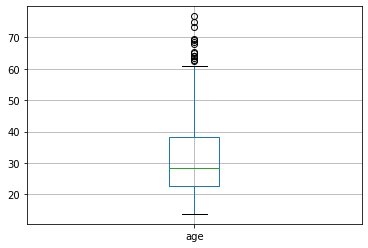

In [41]:
df.boxplot('age')

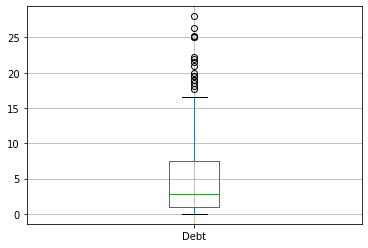

In [42]:
df.boxplot('Debt')

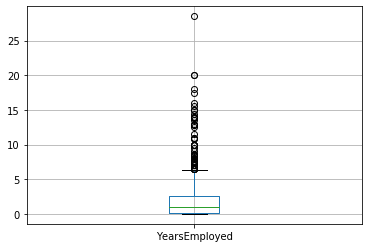

In [43]:
df.boxplot('YearsEmployed')

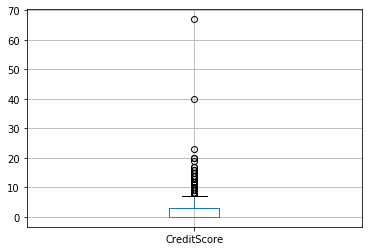

In [44]:
df.boxplot('CreditScore')

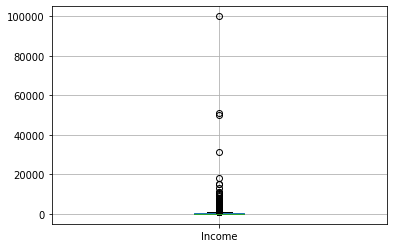

In [45]:
df.boxplot('Income')

In [46]:
#interquartile range
for x in ['age','Debt','YearsEmployed','CreditScore','Income']:
    q75,q25=np.percentile(df.loc[:,x],[75,25])
    iqr=q75-q25
    max=q75+(1.5*iqr)
    min=q25-(1.5*iqr)
    df.loc[df[x]<min,x]=np.nan
    df.loc[df[x]>max,x]=np.nan
    

In [47]:
df.isnull().sum()

gender             0
age               14
Debt              17
Married            0
BankCustomer       0
EducationLevel     0
Ethnicity          0
YearsEmployed     59
PriorDefault       0
Employed           0
CreditScore       79
DriversLicense     0
Citizen            0
ZipCode            0
Income            97
Approved           0
dtype: int64

In [48]:
df=df.dropna(axis=0)

In [49]:
df.isnull().sum()

gender            0
age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [50]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

C:\Users\Windows 7\anaconda3\ana\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
df

,gender,age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,00202,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,00043,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,00280,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,00100,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,00120,0.0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,b,40.58,3.290,u,g,m,v,3.50,f,f,0.0,t,s,00400,0.0,-
459,b,21.08,10.085,y,p,e,h,1.25,f,f,0.0,f,g,00260,0.0,-
460,a,22.67,0.750,u,g,c,v,2.00,f,t,2.0,t,g,00200,394.0,-
461,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1.0,t,g,00200,1.0,-


# 5-data preprocessing

In [52]:
def age(x):
    if x<18:
        return 'teenegar'
    elif x<22:
        return 'youngman'
    elif x<40:
        return 'adult'
    else:
        return 'old'
df['new_age']=df['age'].apply(lambda x:age(x))    

C:\Users\Windows 7\anaconda3\ana\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [53]:
df['new_age'].value_counts()

adult       275
youngman     95
old          61
teenegar     32
Name: new_age, dtype: int64

In [54]:
df['Debt'].min(),df['Debt'].max()

(0.0, 16.5)

In [55]:
df['Debt'].max()

16.5

In [56]:
def degree_debt(x):
    if x<5:
        return 'low'
    elif x<10:
        return 'meduim'
    else:
        return 'high'
df['degree_debt']=df['Debt'].apply(lambda x:degree_debt(x))  

C:\Users\Windows 7\anaconda3\ana\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
df['degree_debt'].value_counts()

low       332
meduim     66
high       65
Name: degree_debt, dtype: int64

In [58]:
df['CreditScore'].min(),df['CreditScore'].max()

(0.0, 7.0)

In [59]:
df['YearsEmployed'].min(),df['YearsEmployed'].max()

(0.0, 6.04)

In [60]:
def exper(x):
    if x <2:
        return 'low experience'
    elif x<4:
        return 'meduim experience'
    else:
        return 'high experience'
df['years_exper']=df['YearsEmployed'].apply(lambda x:exper(x))  

C:\Users\Windows 7\anaconda3\ana\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
df['years_exper'].value_counts()

low experience       345
meduim experience     80
high experience       38
Name: years_exper, dtype: int64

# 6- data visualization

In [62]:
df.head(1)

,gender,age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,new_age,degree_debt,years_exper
0,b,30.83,0.0,u,g,w,v,1.25,t,t,1.0,f,g,00202,0.0,+,adult,low,low experience


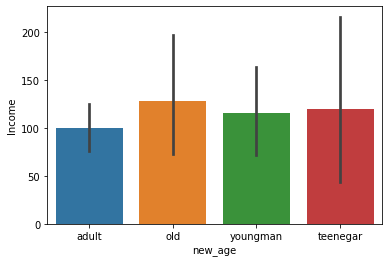

In [63]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=df, y="Income", x="new_age", ax=ax)

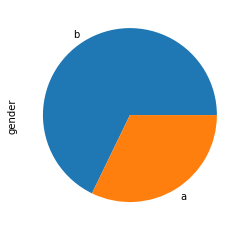

In [64]:
df['gender'].value_counts().plot(kind='pie')

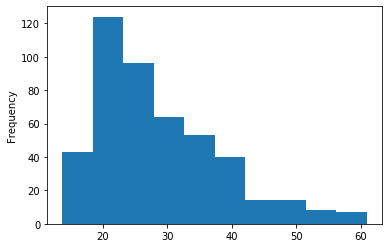

In [65]:
df['age'].plot(kind='hist')

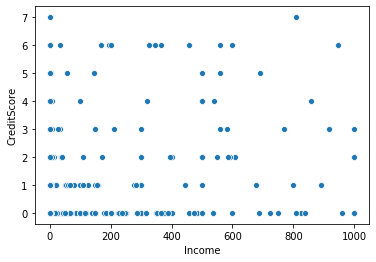

In [66]:
sns.scatterplot(data=df,y='CreditScore',x='Income')

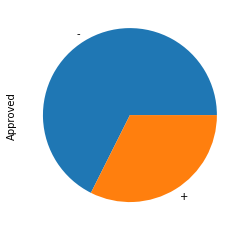

In [67]:
df['Approved'].value_counts().plot(kind='pie')

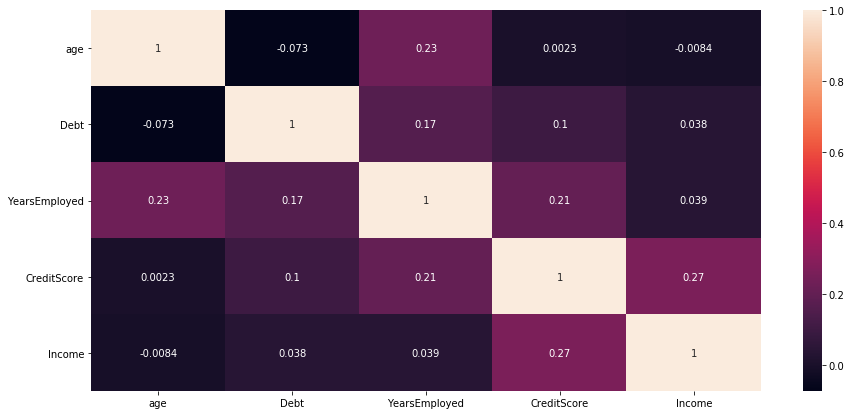

In [68]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

# 7-building machine learning model

In [69]:
df.columns

Index(['gender', 'age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved', 'new_age',
       'degree_debt', 'years_exper'],
      dtype='object')

In [70]:
df.head(1)

,gender,age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,new_age,degree_debt,years_exper
0,b,30.83,0.0,u,g,w,v,1.25,t,t,1.0,f,g,00202,0.0,+,adult,low,low experience


In [71]:
encode_feature=['gender','Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen','ZipCode','Approved','new_age','degree_debt','years_exper']
df[encode_feature]

,gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Approved,new_age,degree_debt,years_exper
0,b,u,g,w,v,t,t,f,g,00202,+,adult,low,low experience
1,a,u,g,q,h,t,t,f,g,00043,+,old,low,meduim experience
2,a,u,g,q,h,t,f,f,g,00280,+,adult,low,low experience
3,b,u,g,w,v,t,t,t,g,00100,+,adult,low,meduim experience
4,b,u,g,w,v,t,f,f,s,00120,+,youngman,meduim,low experience
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,b,u,g,m,v,f,f,t,s,00400,-,old,low,meduim experience
459,b,y,p,e,h,f,f,f,g,00260,-,youngman,high,low experience
460,a,u,g,c,v,f,t,t,g,00200,-,adult,low,meduim experience
461,a,y,p,ff,ff,f,t,t,g,00200,-,adult,high,meduim experience


In [72]:
#one hot encoding
df=pd.get_dummies(df,columns=['gender','Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen','ZipCode','Approved','new_age','degree_debt','years_exper'],drop_first=True)

In [73]:
#select
df.columns

Index(['age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income', 'gender_b',
       'Married_y', 'BankCustomer_p', 'EducationLevel_c', 'EducationLevel_cc',
       ...
       'ZipCode_00840', 'ZipCode_02000', 'Approved_-', 'new_age_old',
       'new_age_teenegar', 'new_age_youngman', 'degree_debt_low',
       'degree_debt_meduim', 'years_exper_low experience',
       'years_exper_meduim experience'],
      dtype='object', length=168)

In [74]:
#machine learning
feature=df.drop(columns=['Approved_-'],axis=1)
target=df['Approved_-']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, shuffle=True)

In [76]:
x_train.shape,y_train.shape

((370, 167), (370,))

In [77]:
scaler= StandardScaler()

In [78]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [80]:
#knn
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

[1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1]


In [81]:
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
print(f'Testing F-1: {f1_score(y_test, y_pred)}')
print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')

Training Accuracy: 0.8189189189189189
Testing Accuracy: 0.7634408602150538
Testing Confusion Matrix: 
[[11 16]
 [ 6 60]]
Testing Recall: 0.9090909090909091
Testing Precesion: 0.7894736842105263
Testing F-1: 0.8450704225352113
Testing F-Beta: 0.810810810810811


In [82]:
#DecisionTree
model = DecisionTreeClassifier(max_depth=2, min_samples_split=4)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1], dtype=uint8)

In [83]:
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
print(f'Testing F-1: {f1_score(y_test, y_pred)}')
print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')

Training Accuracy: 0.8405405405405405
Testing Accuracy: 0.8817204301075269
Testing Confusion Matrix: 
[[23  4]
 [ 7 59]]
Testing Recall: 0.8939393939393939
Testing Precesion: 0.9365079365079365
Testing F-1: 0.9147286821705426
Testing F-Beta: 0.9276729559748429


In [84]:
#RandomForest
model = RandomForestClassifier(n_estimators=100, max_depth= 7, min_samples_leaf=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1], dtype=uint8)

In [85]:
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
print(f'Testing F-1: {f1_score(y_test, y_pred)}')
print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')

Training Accuracy: 0.8513513513513513
Testing Accuracy: 0.8494623655913979
Testing Confusion Matrix: 
[[14 13]
 [ 1 65]]
Testing Recall: 0.9848484848484849
Testing Precesion: 0.8333333333333334
Testing F-1: 0.9027777777777777
Testing F-Beta: 0.8597883597883599


In [86]:
#LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1]


In [87]:
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
print(f'Testing F-1: {f1_score(y_test, y_pred)}')
print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')

Training Accuracy: 0.9567567567567568
Testing Accuracy: 0.8172043010752689
Testing Confusion Matrix: 
[[16 11]
 [ 6 60]]
Testing Recall: 0.9090909090909091
Testing Precesion: 0.8450704225352113
Testing F-1: 0.8759124087591241
Testing F-Beta: 0.857142857142857
